# GRIP - THE SPARKS FOUNDATION
### Data Science and Businesss Analytics Task 1 - Prediction Using Supervised ML
#### Author : Mudita Sharma

#### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

#### Loading data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Getting information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#checking if there are any null values
df.isnull().sum() 

Hours     0
Scores    0
dtype: int64

#### Plotting a scatter plot to find relation between variables

C:\Users\mudit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


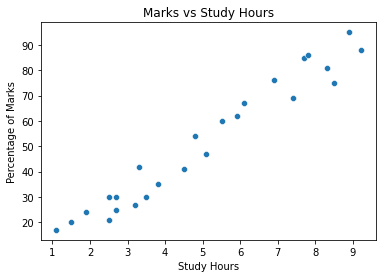

In [9]:
sns.scatterplot(df.Hours,df.Scores)
plt.title('Marks vs Study Hours')
plt.ylabel('Percentage of Marks')
plt.xlabel('Study Hours')
plt.show()

In [ ]:
#Finding the sahpe of the dataset
df.shape

#### Preparing the data for training- train and test split

In [82]:
#  Split the data into training/testing sets
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 


In [83]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [84]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [85]:
X_train

array([[3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

#### Standardizing the dataset

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [98]:
X_train

array([[-0.52813656],
       [-1.40686591],
       [-0.7573703 ],
       [-0.2606972 ],
       [ 1.42035024],
       [ 1.26752775],
       [-0.64275343],
       [-0.94839842],
       [-1.25404341],
       [-0.14608033],
       [ 0.35059278],
       [ 1.00008838],
       [ 0.12135904],
       [ 0.96188276],
       [-1.5596884 ],
       [ 0.84726589],
       [ 1.53496712]])

In [99]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [100]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [101]:
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
np.mean(mse)

-48.29147771770576

### Making prediction

In [102]:
##prediction 
prediction=regressor.predict(X_test)
prediction

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [103]:
# Comparing Actual vs Predicted
pred = pd.DataFrame({'Actual values': y_test, 'Predicted values': prediction})  
pred 

,Actual values,Predicted values
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


In [104]:
# Prediction Using input data
# You can also test with your own data
study_hrs= 2.5


In [105]:
custom_pred = regressor.predict([[study_hrs]])
# print("Predicted Score for = {}".format(custom_pred[0]))
print("Predicted score for" ,study_hrs,"Study hours = {}".format(custom_pred[0]))

Predicted score for 2.5 Study hours = 116.6589533032697
